<a href="https://colab.research.google.com/github/czarkumaran2006/CodeAlpha_CreditScoringModel/blob/main/Credit_Scoring_Model_CodeAlpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2786263625.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/content/german.csv', delim_whitespace=True, header=None)



Logistic Regression Evaluation:
Accuracy: 0.78
Precision: 0.8089171974522293
Recall: 0.900709219858156
F1 Score: 0.8523489932885906
ROC AUC: 0.8172857314581078


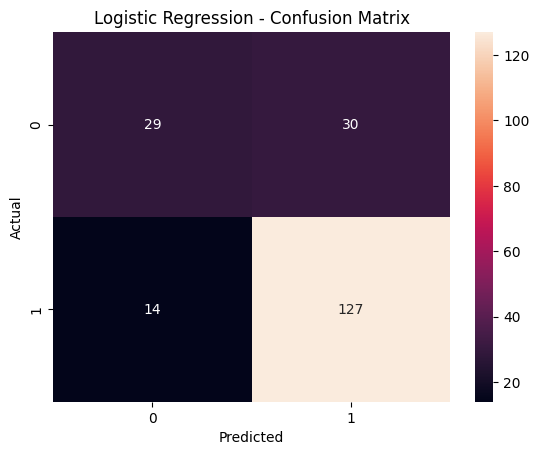

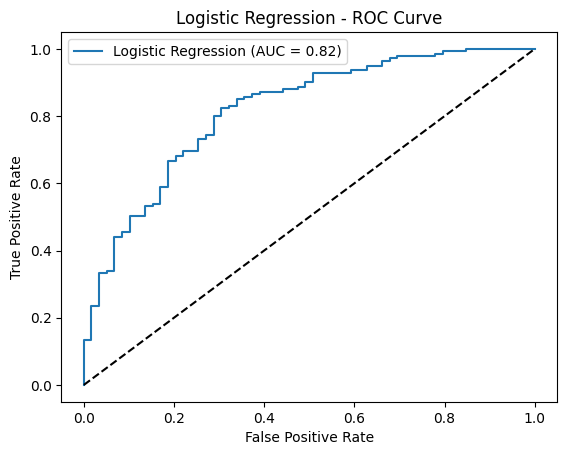


Decision Tree Evaluation:
Accuracy: 0.73
Precision: 0.7806451612903226
Recall: 0.8581560283687943
F1 Score: 0.8175675675675675
ROC AUC: 0.6409424209640582


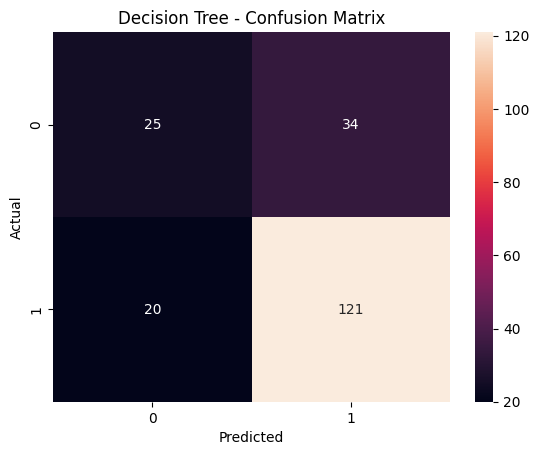

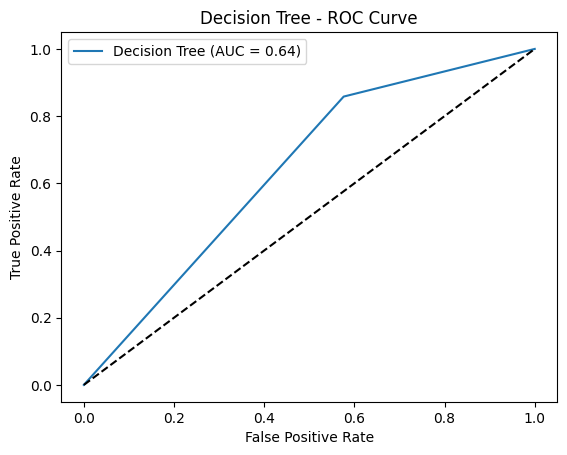


Random Forest Evaluation:
Accuracy: 0.81
Precision: 0.8238993710691824
Recall: 0.9290780141843972
F1 Score: 0.8733333333333333
ROC AUC: 0.8281043394638778


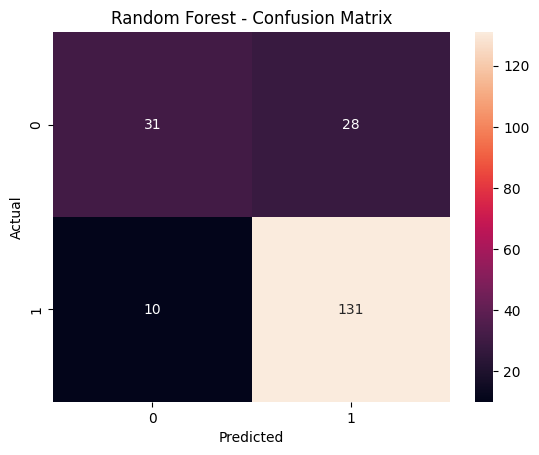

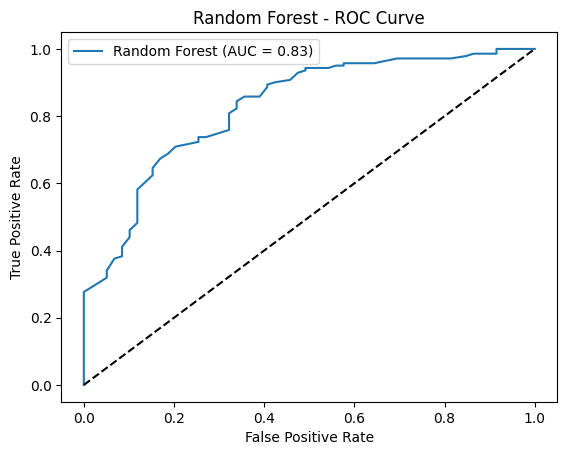

In [ ]:
# -*- coding: utf-8 -*-
"""Credit_Scoring_Model_CodeAlpha.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1cFBDdMR6iNFJdaoiUYIj0dSC0X67QUjn
"""

# STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)

# STEP 2: Load dataset (space-separated format)
df = pd.read_csv('/content/german.csv', delim_whitespace=True, header=None)

# STEP 3: Assign meaningful column names
df.columns = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount", "Savings",
    "EmploymentSince", "InstallmentRate", "PersonalStatusSex", "OtherDebtors",
    "ResidenceSince", "Property", "Age", "OtherInstallmentPlans", "Housing",
    "NumberCredits", "Job", "LiablePeople", "Telephone", "ForeignWorker", "Target"
]

# STEP 4: Basic preprocessing
# Convert target to binary: 1 = Good (1), 2 = Bad (0)
df["Target"] = df["Target"].map({1: 1, 2: 0})

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Feature and label split
X = df.drop("Target", axis=1)
y = df["Target"]

# Optional: Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))

    # Confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} - ROC Curve")
    plt.legend()
    plt.show()


# STEP 5: Train and evaluate models

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
evaluate_model(lr, "Logistic Regression")

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
evaluate_model(dt, "Decision Tree")

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, "Random Forest")